# Breast Cancer Fine-Needle Classification

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict, validation_curve
import tensorflow as tf

tf.enable_eager_execution()
from tensorflow.keras.layers import *
from tensorflow import keras
import random

## 1. load and preprocessing dataset:

In [0]:
from google.colab import drive
drive.mount('/content/drive')
#%cd '/content/drive/My Drive/deep learning/Breast Cancer Fine-Needle Classification'
%cd '/content/drive/My Drive/Breast Cancer Fine-Needle Classification'

!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Breast Cancer Fine-Needle Classification
data.csv  presentations  project.ipynb


In [0]:
data = pd.read_csv("data.csv",header=0)

data.drop("Unnamed: 32",axis=1,inplace=True)
data.drop("id",axis=1,inplace=True)
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

y = data.diagnosis.values
x = data.drop(['diagnosis'], axis=1)
  
  
train, test = train_test_split(data, test_size = 0.25)

train_y = train.diagnosis.values

train_x = train.drop(['diagnosis'], axis=1)
train_x = train_x.as_matrix()


test_y = test.diagnosis.values

test_x = test.drop(['diagnosis'], axis=1)
test_x = test_x.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


### 1.1 Explore the Data

In [0]:
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

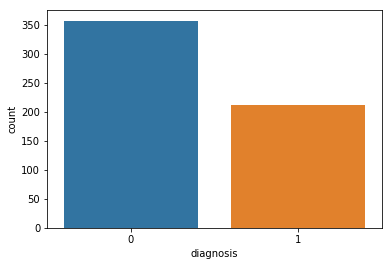

In [0]:
# lets get the frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")

### 1.3 data normalization:

In [0]:
#x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values  
x_mean = x.mean()
x_std = x.std()
x = (x - x_mean)/x_std

### 2 Logistic Regression Model:

### 2.1 simple logistic regression model:

In [0]:
logreg = LogisticRegression()
kfold = KFold(n_splits=5,random_state=7)
cv_results = cross_val_score(logreg, x, y, cv=kfold)
print (cv_results.mean()*100, "%")

97.7177456916628 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

### 2.2 we optimize the parameters of our model:

In [0]:
logreg = LogisticRegression()
param_grid = {"C":[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=kfold)
grid.fit(x,y)
print (grid.best_estimator_)
print (grid.best_score_*100, "%")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
97.89103690685414 %


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2.3 the validation curve:

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

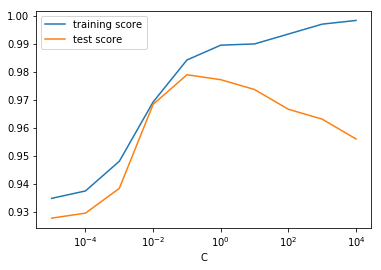

In [0]:
num_splits = 5
num_C_values = 10 # we iterate over 10 possible C values
logreg = LogisticRegression()
kfold = KFold(n_splits=5,random_state=7)
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
train_scores, valid_scores = validation_curve(logreg, x, y, "C", C_values, cv=kfold)
train_scores = pd.DataFrame(data=train_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
valid_scores = pd.DataFrame(data=valid_scores, index=np.arange(0, num_C_values), columns=np.arange(0,num_splits)) 
plt.semilogx(C_values, train_scores.mean(axis=1), label='training score')
plt.semilogx(C_values, valid_scores.mean(axis=1), label='test score')
plt.xlabel('C')
plt.legend()

As we can see, the optimum point is at C=0.1, where we get an accuracy of 97.89%.

## 3 Neural Net:

### 3.1 data normalization:

In [0]:
train_x_mean = train_x.mean()
train_x_std = train_x.std()
train_x = (train_x - train_x_mean)/train_x_std

test_x_mean = test_x.mean()
test_x_std = test_x.std()
test_x = (test_x - test_x_mean)/test_x_std


### 3.1 Two-layer Neural Net with Tanh  Activation:

In [0]:
tanh_nn_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(4,input_shape=(30,), activation='tanh'),
      tf.keras.layers.Dense(1, activation='sigmoid')
      
  ])

In [0]:
BATCH_SIZE = 64
EPOCHS = 150
# compile and fit the model with the appropriate parameters.
tanh_nn_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
tanh_nn_model.fit(train_x, train_y, verbose=1, epochs=EPOCHS, batch_size= BATCH_SIZE)
# Use the evaluate method to test the model.
loss, accuracy = tanh_nn_model.evaluate(test_x, test_y, batch_size=16)
print("Loss = {:.3f}".format(loss))
print("Accuracy = {:.3f}".format(accuracy))

Epoch 1/150
426/426 [==============================] - 0s 680us/sample - loss: 0.8217 - acc: 0.3427
Epoch 2/150
426/426 [==============================] - 0s 31us/sample - loss: 0.7674 - acc: 0.3286
Epoch 3/150
426/426 [==============================] - 0s 34us/sample - loss: 0.7256 - acc: 0.3357
Epoch 4/150
426/426 [==============================] - 0s 30us/sample - loss: 0.6917 - acc: 0.4742
Epoch 5/150
426/426 [==============================] - 0s 33us/sample - loss: 0.6655 - acc: 0.6808
Epoch 6/150
426/426 [==============================] - 0s 31us/sample - loss: 0.6437 - acc: 0.7676
Epoch 7/150
426/426 [==============================] - 0s 32us/sample - loss: 0.6222 - acc: 0.7793
Epoch 8/150
426/426 [==============================] - 0s 33us/sample - loss: 0.6035 - acc: 0.8075
Epoch 9/150
426/426 [==============================] - 0s 33us/sample - loss: 0.5850 - acc: 0.8099
Epoch 10/150
426/426 [==============================] - 0s 33us/sample - loss: 0.5676 - acc: 0.8310
Epoch 11

### 3.1 Two-layer Neural Net with RELU  Activation:

In [0]:
relu_nn_model = tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(7,input_shape=(30,), activation='relu'),
      tf.keras.layers.Dense(2, activation='softmax')
      
  ])

In [0]:
BATCH_SIZE = 64
EPOCHS = 150
# compile and fit the model with the appropriate parameters.
relu_nn_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
relu_nn_model.fit(train_x, train_y, verbose=1, epochs=EPOCHS, batch_size= BATCH_SIZE)
# Use the evaluate method to test the model.
loss, accuracy = relu_nn_model.evaluate(test_x, test_y, batch_size=16)
print("Loss = {:.3f}".format(loss))
print("Accuracy = {:.3f}".format(accuracy))

Epoch 1/150
426/426 [==============================] - 0s 486us/sample - loss: 0.8184 - acc: 0.3545
Epoch 2/150
426/426 [==============================] - 0s 35us/sample - loss: 0.7582 - acc: 0.3545
Epoch 3/150
426/426 [==============================] - 0s 32us/sample - loss: 0.7142 - acc: 0.3498
Epoch 4/150
426/426 [==============================] - 0s 29us/sample - loss: 0.6806 - acc: 0.4178
Epoch 5/150
426/426 [==============================] - 0s 37us/sample - loss: 0.6551 - acc: 0.6479
Epoch 6/150
426/426 [==============================] - 0s 32us/sample - loss: 0.6363 - acc: 0.8310
Epoch 7/150
426/426 [==============================] - 0s 31us/sample - loss: 0.6179 - acc: 0.8498
Epoch 8/150
426/426 [==============================] - 0s 30us/sample - loss: 0.6000 - acc: 0.8756
Epoch 9/150
426/426 [==============================] - 0s 30us/sample - loss: 0.5832 - acc: 0.8897
Epoch 10/150
426/426 [==============================] - 0s 34us/sample - loss: 0.5670 - acc: 0.8920
Epoch 11

## 4 CNN:

In [0]:
train_x = train_x.reshape(train_x.shape[0], 10, 3).astype('float32')
test_x = test_x.reshape(test_x.shape[0], 10, 3).astype('float32')
model = tf.keras.Sequential()
model.add(Conv1D(filters=32, kernel_size=5, input_shape=(10, 3)))
model.add(MaxPooling1D(pool_size=5 ))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [131]:
BATCH_SIZE = 64
EPOCHS = 100

#compile and fit the model with the appropriate parameters.
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(train_x, train_y, verbose=1, epochs=EPOCHS, batch_size= BATCH_SIZE)
# Use the evaluate method to test the model.
loss, accuracy = relu_nn_model.evaluate(test_x, test_y, batch_size=16)
print("Loss = {:.3f}".format(loss))
print("Accuracy = {:.3f}".format(accuracy))

Epoch 1/100
426/426 [==============================] - 1s 2ms/sample - loss: 0.1317 - acc: 0.9413
Epoch 2/100
426/426 [==============================] - 0s 53us/sample - loss: 0.1307 - acc: 0.9507
Epoch 3/100
426/426 [==============================] - 0s 53us/sample - loss: 0.1324 - acc: 0.9460
Epoch 4/100
426/426 [==============================] - 0s 44us/sample - loss: 0.1314 - acc: 0.9484
Epoch 5/100
426/426 [==============================] - 0s 52us/sample - loss: 0.1325 - acc: 0.9437
Epoch 6/100
426/426 [==============================] - 0s 57us/sample - loss: 0.1288 - acc: 0.9484
Epoch 7/100
426/426 [==============================] - 0s 54us/sample - loss: 0.1285 - acc: 0.9531
Epoch 8/100
426/426 [==============================] - 0s 48us/sample - loss: 0.1285 - acc: 0.9507
Epoch 9/100
426/426 [==============================] - 0s 49us/sample - loss: 0.1284 - acc: 0.9460
Epoch 10/100
426/426 [==============================] - 0s 52us/sample - loss: 0.1279 - acc: 0.9507
Epoch 11/1